In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and Pre-process the Data

In [12]:
data = pd.read_csv('simulated_transaction_2024.csv')
data.head()

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,01/01/2023,00:00,678330503.0,2971.0,1584.0,NaN,Westport Care Home
1,01/01/2023,00:00,472213568.0,3792.0,1950.0,NaN,Barbiee Boutique
2,01/01/2023,00:00,472213568.0,3012.0,-780.0,283027736.0,NaN
3,01/01/2023,00:00,283027736.0,1787.0,780.0,472213568.0,NaN
4,01/01/2023,00:00,624500124.0,3226.0,1825.0,NaN,Fat Face


In [13]:
# Combine Date and Timestamp into a single datetime column
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Timestamp'], dayfirst=True)

# Check the conversion
data['Datetime'].head()

0   2023-01-01
1   2023-01-01
2   2023-01-01
3   2023-01-01
4   2023-01-01
Name: Datetime, dtype: datetime64[ns]

In [14]:
data.head()

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name,Datetime
0,01/01/2023,00:00,678330503.0,2971.0,1584.0,NaN,Westport Care Home,2023-01-01
1,01/01/2023,00:00,472213568.0,3792.0,1950.0,NaN,Barbiee Boutique,2023-01-01
2,01/01/2023,00:00,472213568.0,3012.0,-780.0,283027736.0,NaN,2023-01-01
3,01/01/2023,00:00,283027736.0,1787.0,780.0,472213568.0,NaN,2023-01-01
4,01/01/2023,00:00,624500124.0,3226.0,1825.0,NaN,Fat Face,2023-01-01


# Data Mining

## Classify the transactions into different categories

In [15]:
# Getting the unique values of the "Third Party Name" column to understand potential categories
unique_third_parties = data['Third Party Name'].unique()
unique_third_parties

array(['Westport Care Home', 'Barbiee Boutique', nan, 'Fat Face',
       'Lavender Primary', 'A Cut Above', 'Tesco', 'Brilliant Brushes',
       'Costa Coffee', 'Premier Finance', 'North Face', 'Craftastic',
       'Fitted Stitch', 'Selfridges', 'Starbucks', 'The Crown',
       'Cass Art', 'Green Park Academy', 'Rose & Crown', 'Kings Arms',
       'Sunny Care Nursery', 'A Yarn Story', 'Pets Corner',
       'Lavender Fields', 'Victoria Park', 'Halifax', 'LBG', 'Blizzard',
       'Xbox', 'Mojang Studios', 'PureGym', 'Disney', 'Netflix',
       'Grand Union BJJ', 'Amazon', 'SquareOnix', 'Deliveroo', 'JustEat',
       'Coop Local', 'Sainsbury', 'AMAZON', 'The Works', "Blackwell's",
       'Topshop', 'Matalan', 'Foyles', 'Wool', 'Hobby Lobby', 'Revella',
       'Sainsbury Local', 'Loosely Fitted', 'Stitch By Stitch',
       'Coffee #1', 'Hobbycraft', 'Lloyds Pharmacy', 'Gamestation', 'CeX',
       'Etsy', 'Five Senses Art', 'Sports Direct', 'Boots', 'Reebok',
       'JD Sports', 'Head', 'Fr

In [16]:
# Mapping function to categorize each third party name
def categorize_third_party(name):
    categories = {
        'Healthcare': ['Westport Care Home', 'University College Hospital', 'Happy Days Home', 'Remedy plus care',
                       'Lloyds Pharmacy', 'Vision Express', 'Specsavers'],
        'Retail': ['Barbiee Boutique', 'Fat Face', 'Tesco', 'Brilliant Brushes', 'Selfridges', 'Starbucks', 'Cass Art',
                   'Pets Corner', 'Halifax', 'Amazon', 'Topshop', 'Matalan', 'Foyles', 'Hobby Lobby', 'Revella',
                   'Sainsbury', 'The Works', "Blackwell's", 'Wool', 'Gamestation', 'CeX', 'Etsy', 'Sports Direct', 'Boots',
                   'Reebok', 'JD Sports', 'Gap Kids', 'HMV', 'Millets', 'Mothercare', 'Tesc'],
        'Education': ['Lavender Primary', 'Green Park Academy', 'Victoria Park', 'RugbyFields', 'Town High', 'Kew House'],
        'Services': ['A Cut Above', 'Premier Finance', 'LBG', 'SquareOnix', 'CPA'],
        'Entertainment & Leisure': ['Costa Coffee', 'The Crown', 'Rose & Crown', 'Kings Arms', 'PureGym', 'Disney',
                                    'Netflix', 'Grand Union BJJ', 'Deliveroo', 'JustEat', 'Coffee #1'],
        'Art & Crafts': ['Craftastic', 'Fitted Stitch', 'A Yarn Story', 'Loosely Fitted', 'Stitch By Stitch', 'Five Senses Art',
                         'Collector Cave'],
        'Technology & Gaming': ['Blizzard', 'Xbox', 'Mojang Studios'],
        'Pet Care': ['Pets at Home', 'Jollyes'],
        'Maternity & Child Care': ['Sunny Care Nursery', 'Mamas & Papas']
    }
    for category, names in categories.items():
        if name in names:
            return category
    return 'Other'

# Apply the categorization to the 'Third Party Name' column
data['Category'] = data['Third Party Name'].apply(categorize_third_party)

# Check the categorization and counts per category
category_counts = data['Category'].value_counts()
category_counts


Category
Retail                     132917
Entertainment & Leisure     42156
Other                       15416
Art & Crafts                14353
Technology & Gaming         13187
Services                     8295
Healthcare                   3477
Education                     454
Pet Care                      242
Maternity & Child Care         99
Name: count, dtype: int64

In [17]:
data.head()

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name,Datetime,Category
0,01/01/2023,00:00,678330503.0,2971.0,1584.0,NaN,Westport Care Home,2023-01-01,Healthcare
1,01/01/2023,00:00,472213568.0,3792.0,1950.0,NaN,Barbiee Boutique,2023-01-01,Retail
2,01/01/2023,00:00,472213568.0,3012.0,-780.0,283027736.0,NaN,2023-01-01,Other
3,01/01/2023,00:00,283027736.0,1787.0,780.0,472213568.0,NaN,2023-01-01,Other
4,01/01/2023,00:00,624500124.0,3226.0,1825.0,NaN,Fat Face,2023-01-01,Retail


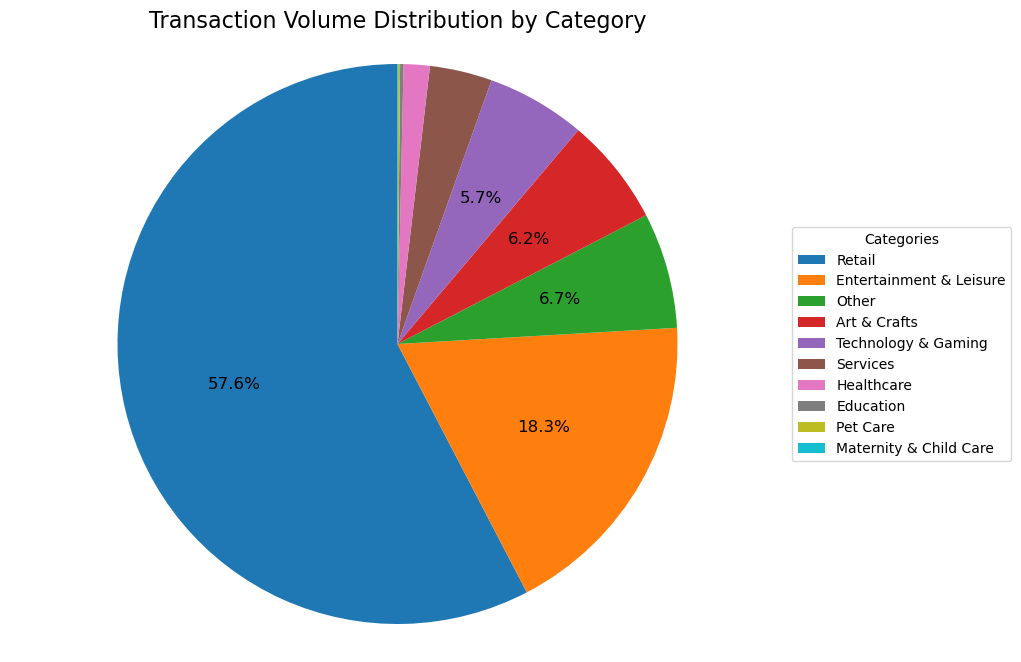

In [18]:
labels = category_counts.index
sizes = category_counts.values
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 1st slice (i.e., 'Retail')

# Adjusting the autopct parameter to only show percentages >= 5%
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        if pct >= 5:
            return '{p:.1f}%'.format(p=pct)
        else:
            return ''
    return my_format

fig1, ax1 = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax1.pie(sizes, labels=None, autopct=autopct_format(sizes), startangle=90, textprops={'fontsize': 12})

ax1.axis('equal')
plt.title("Transaction Volume Distribution by Category", fontsize=16)
plt.legend(wedges, labels, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


## Transaction volume by different categories and the hour of the day

C:\Users\86133\AppData\Local\Temp\ipykernel_2544\3242132705.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


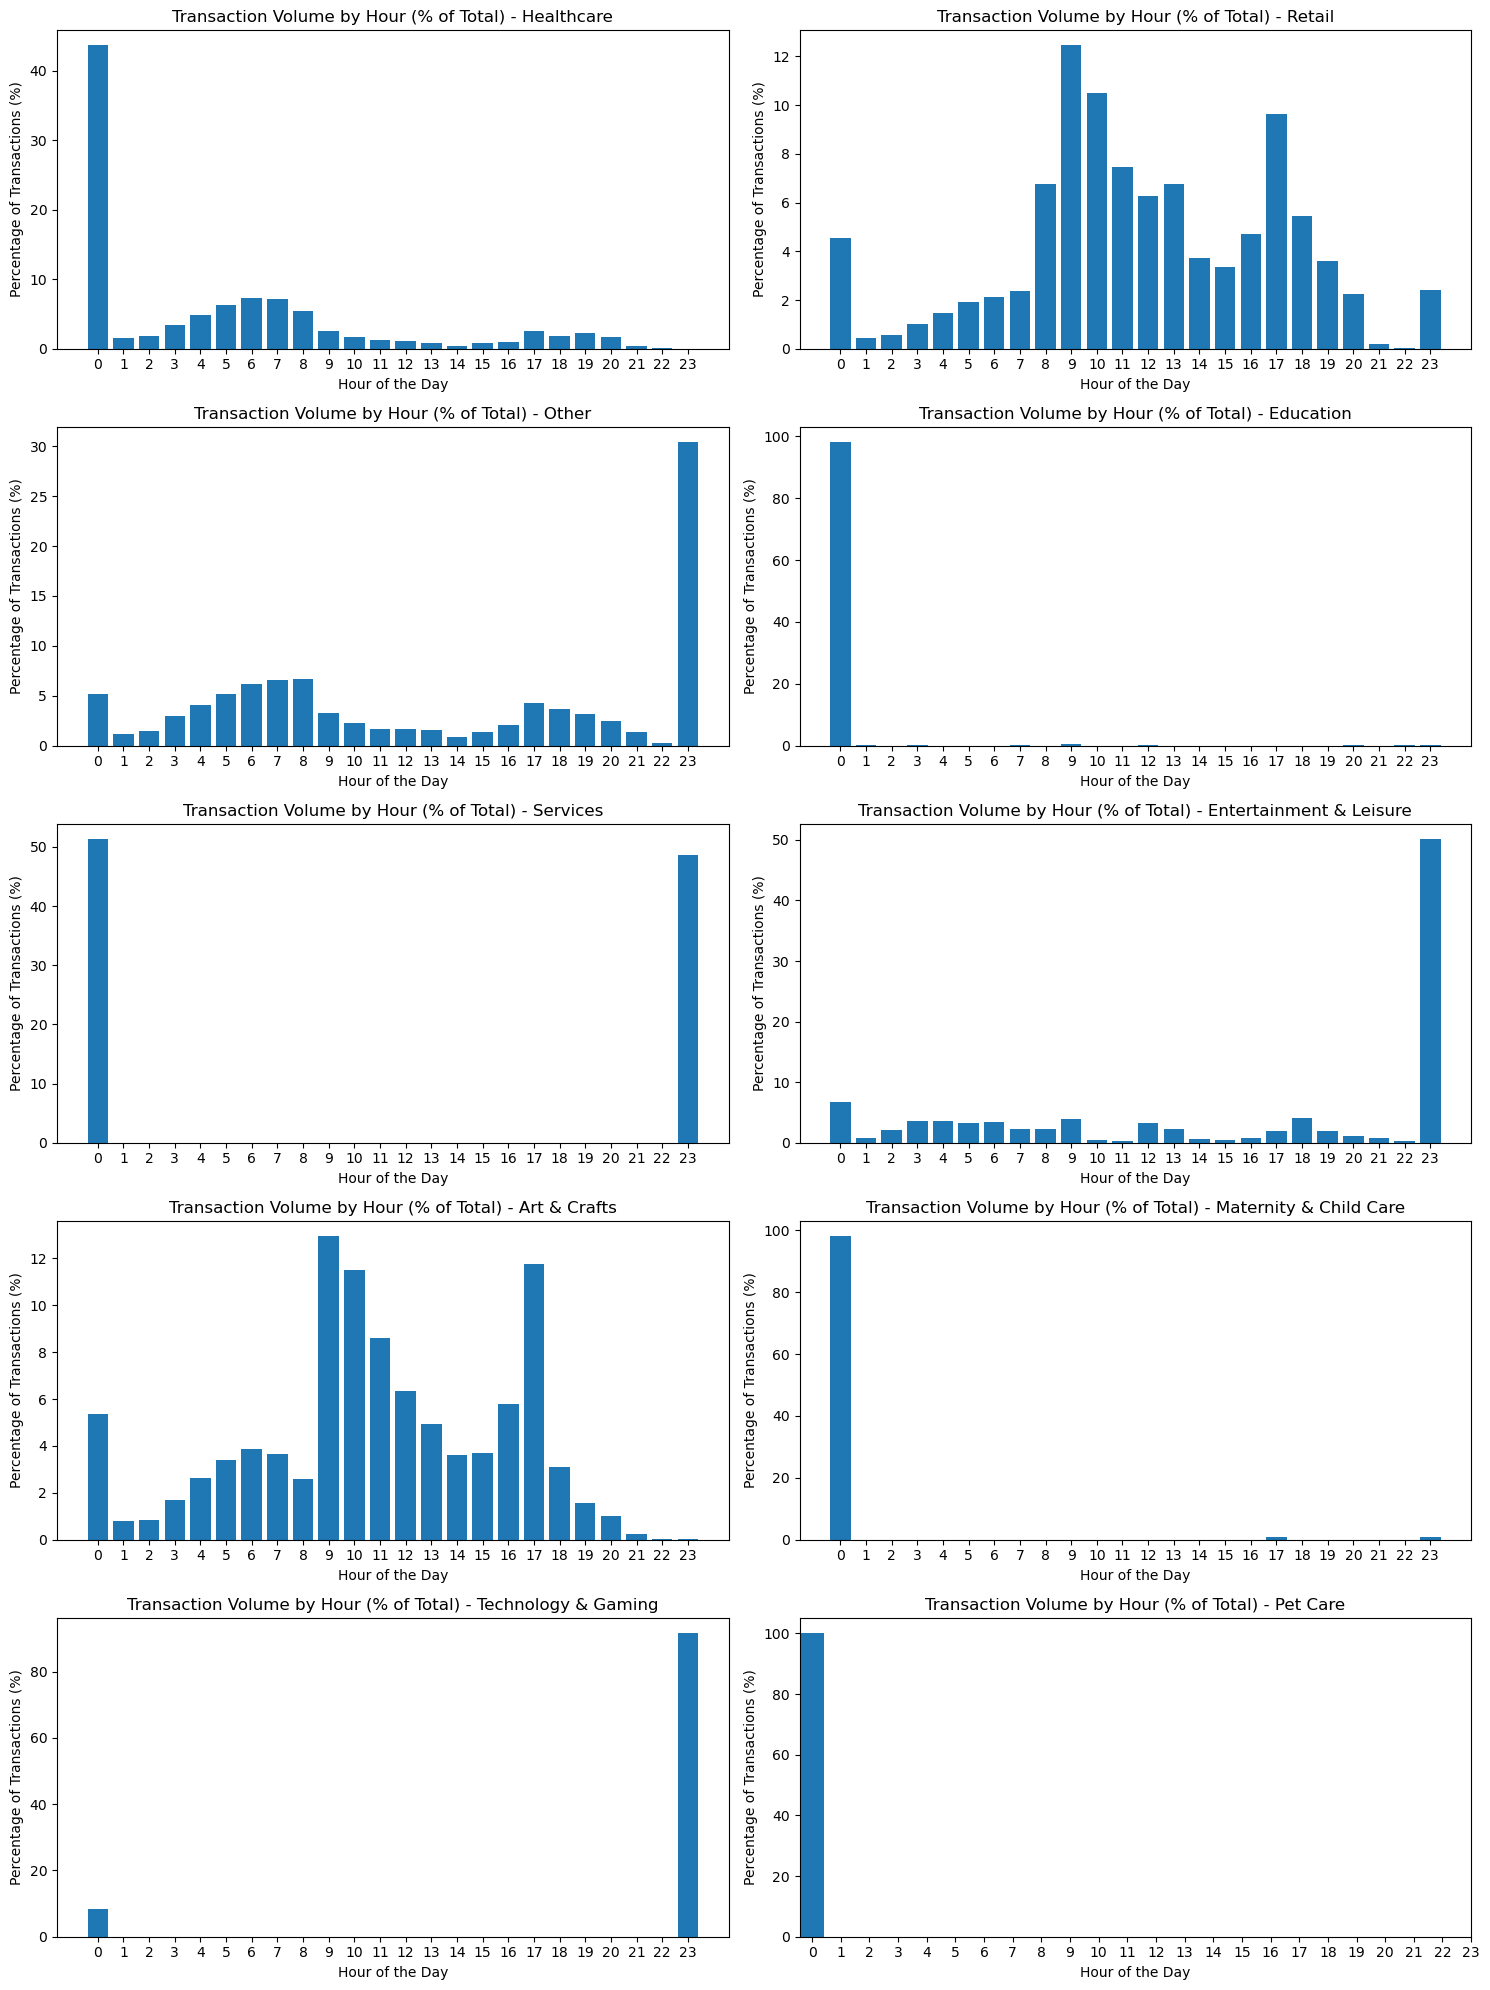

In [19]:
data['Hour'] = data['Datetime'].dt.hour

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 20), constrained_layout=True)
axs = axs.flatten()

for index, category in enumerate(data['Category'].unique()):
    category_data = data[data['Category'] == category]
    hourly_counts = category_data.groupby('Hour').size()
    hourly_percentage = (hourly_counts / hourly_counts.sum()) * 100

    axs[index].bar(hourly_percentage.index, hourly_percentage.values)
    axs[index].set_title(f'Transaction Volume by Hour (% of Total) - {category}')
    axs[index].set_xlabel('Hour of the Day')
    axs[index].set_ylabel('Percentage of Transactions (%)')
    axs[index].set_xticks(range(0, 24))

plt.tight_layout()
plt.show()

Based on the transaction volume charts by hour for different categories, we can observe several distinct patterns:

1. **Healthcare**:
   - The chart indicates a massive spike in transactions right at the start of the day at 0:00. This could suggest automated processing of transactions, such as insurance payments or batched billing activities, which are often processed at the beginning of a new day.

2. **Retail**:
   - Retail transactions seem to have two noticeable peaks, one in the late morning and another in the early evening. This pattern aligns with typical shopping behavior, with people shopping during lunch hours and after work.

3. **Other**:
   - This category shows a more even distribution of transactions throughout the day with slight increases in early morning and mid-afternoon. The nature of these transactions could be more varied, hence the more uniform distribution.

4. **Education**:
   - There is a significant peak at 0:00 and virtually no activity throughout the rest of the day. This could indicate a system that processes transactions (like tuition or fee payments) at a specific time.

5. **Services**:
   - The spike at 0:00 suggests either automated billing or scheduled service charges. The absence of transactions during the day could mean that actual service payments are classified elsewhere or occur less frequently.

6. **Entertainment & Leisure**:
   - The volume is heavily skewed towards the end of the day, starting to rise in the afternoon and peaking at 23:00. This is consistent with leisure activities and entertainment usage, which typically increase after work hours.

7. **Art & Crafts**:
   - Transactions are more spread out with peaks at midday and in the evening, which might reflect the times when customers engage in leisure activities related to arts and crafts.

8. **Maternity & Child Care**:
   - With the majority of transactions occurring at 0:00, it's possible that this is related to automated payment systems or subscription services for child care facilities.

9. **Technology & Gaming**:
   - A huge peak at 0:00 could represent automated renewals or purchases that are processed when the day turns over. The smaller peak around 18:00-19:00 may indicate after-work purchasing behavior.

10. **Pet Care**:
    - With a sole peak at 0:00, similar to maternity and child care, this could point to automated payments or scheduled service charges, possibly for pet insurance or subscription-based pet services.

Overall, the 0:00 spikes across several categories are indicative of automated systems that process transactions at the start of a new day. The patterns seen in retail and entertainment align with typical consumer behavior, where transactions occur during likely shopping or leisure times.

## Transaction volume by month (3 times for September)

C:\Users\86133\AppData\Local\Temp\ipykernel_2544\3728925815.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


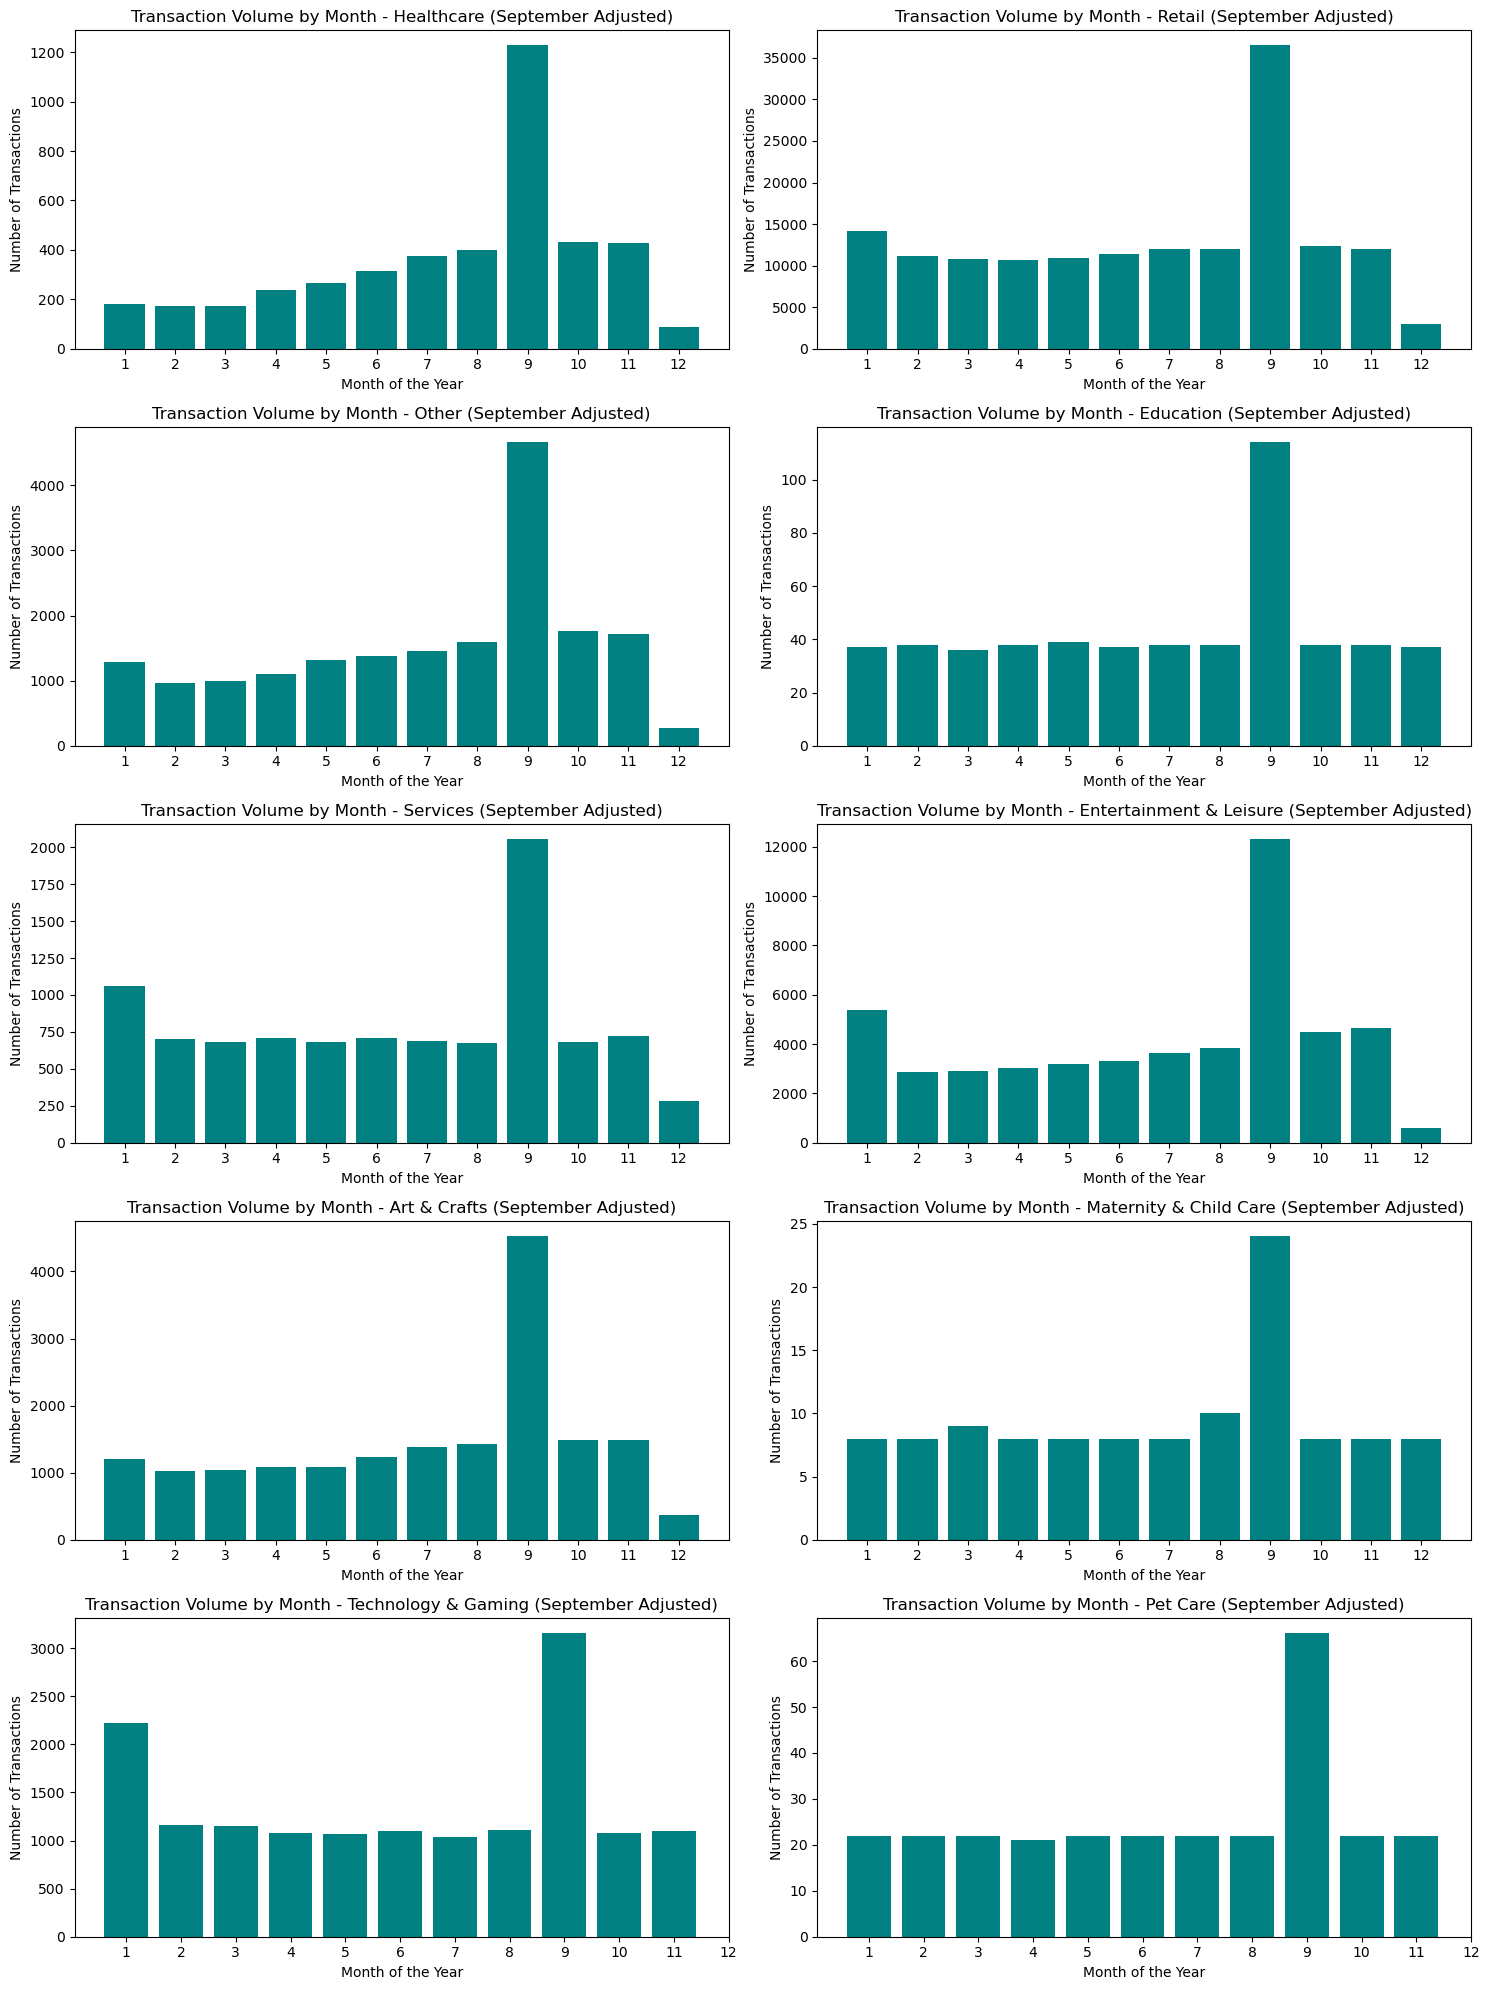

In [20]:
data['Month'] = data['Datetime'].dt.month
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 20), constrained_layout=True)
axs = axs.flatten()

for index, category in enumerate(data['Category'].unique()):
    category_data = data[data['Category'] == category]
    monthly_counts = category_data.groupby('Month').size()

    if 9 in monthly_counts.index:
        monthly_counts[9] *= 3

    axs[index].bar(monthly_counts.index, monthly_counts.values, color='teal')
    axs[index].set_title(f'Transaction Volume by Month - {category} (September Adjusted)')
    axs[index].set_xlabel('Month of the Year')
    axs[index].set_ylabel('Number of Transactions')
    axs[index].set_xticks(range(1, 13))

plt.tight_layout()
plt.show()


1. **Retail**
Retail sees robust transaction activity year-round with a significant peak in September due to seasonal sales like back-to-school promotions, and another in December, likely driven by holiday shopping.

2. **Entertainment & Leisure**
Transactions in Entertainment & Leisure peak during traditional vacation seasons, particularly in the summer and winter holidays, indicating increased spending on leisure activities during these periods.

3. **Services**
The Services category exhibits steady demand throughout the year with slight increases around mid-year and year-end, possibly due to financial and service renewals.

4. **Healthcare**
Healthcare transactions remain stable across the year, reflecting the essential and non-seasonal nature of medical services.

5. **Art & Crafts**
Art & Crafts transactions peak during the middle and end of the year, aligning with holiday seasons and summer breaks, suggesting increased hobby-related activities during these times.

6. **Technology & Gaming**
This category shows transaction peaks around mid-year and end-year, likely influenced by new technology releases and holiday sales.

7. **Pet Care**
Pet Care maintains a consistent transaction volume throughout the year, indicating steady demand for pet-related products and services.

8. **Maternity & Child Care**
Transaction volumes in Maternity & Child Care are low but steady, underscoring the essential and consistent nature of these services.

9. **Education**
Education-related transactions peak at the start and end of academic terms, reflecting spending tied to the school calendar.

10. **Other**
The Other category, which includes miscellaneous transactions, shows moderate fluctuations, suggesting varied activities that do not fit neatly into the main categories.


## Transactions volume by the day of the week

C:\Users\86133\AppData\Local\Temp\ipykernel_2544\2474579240.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


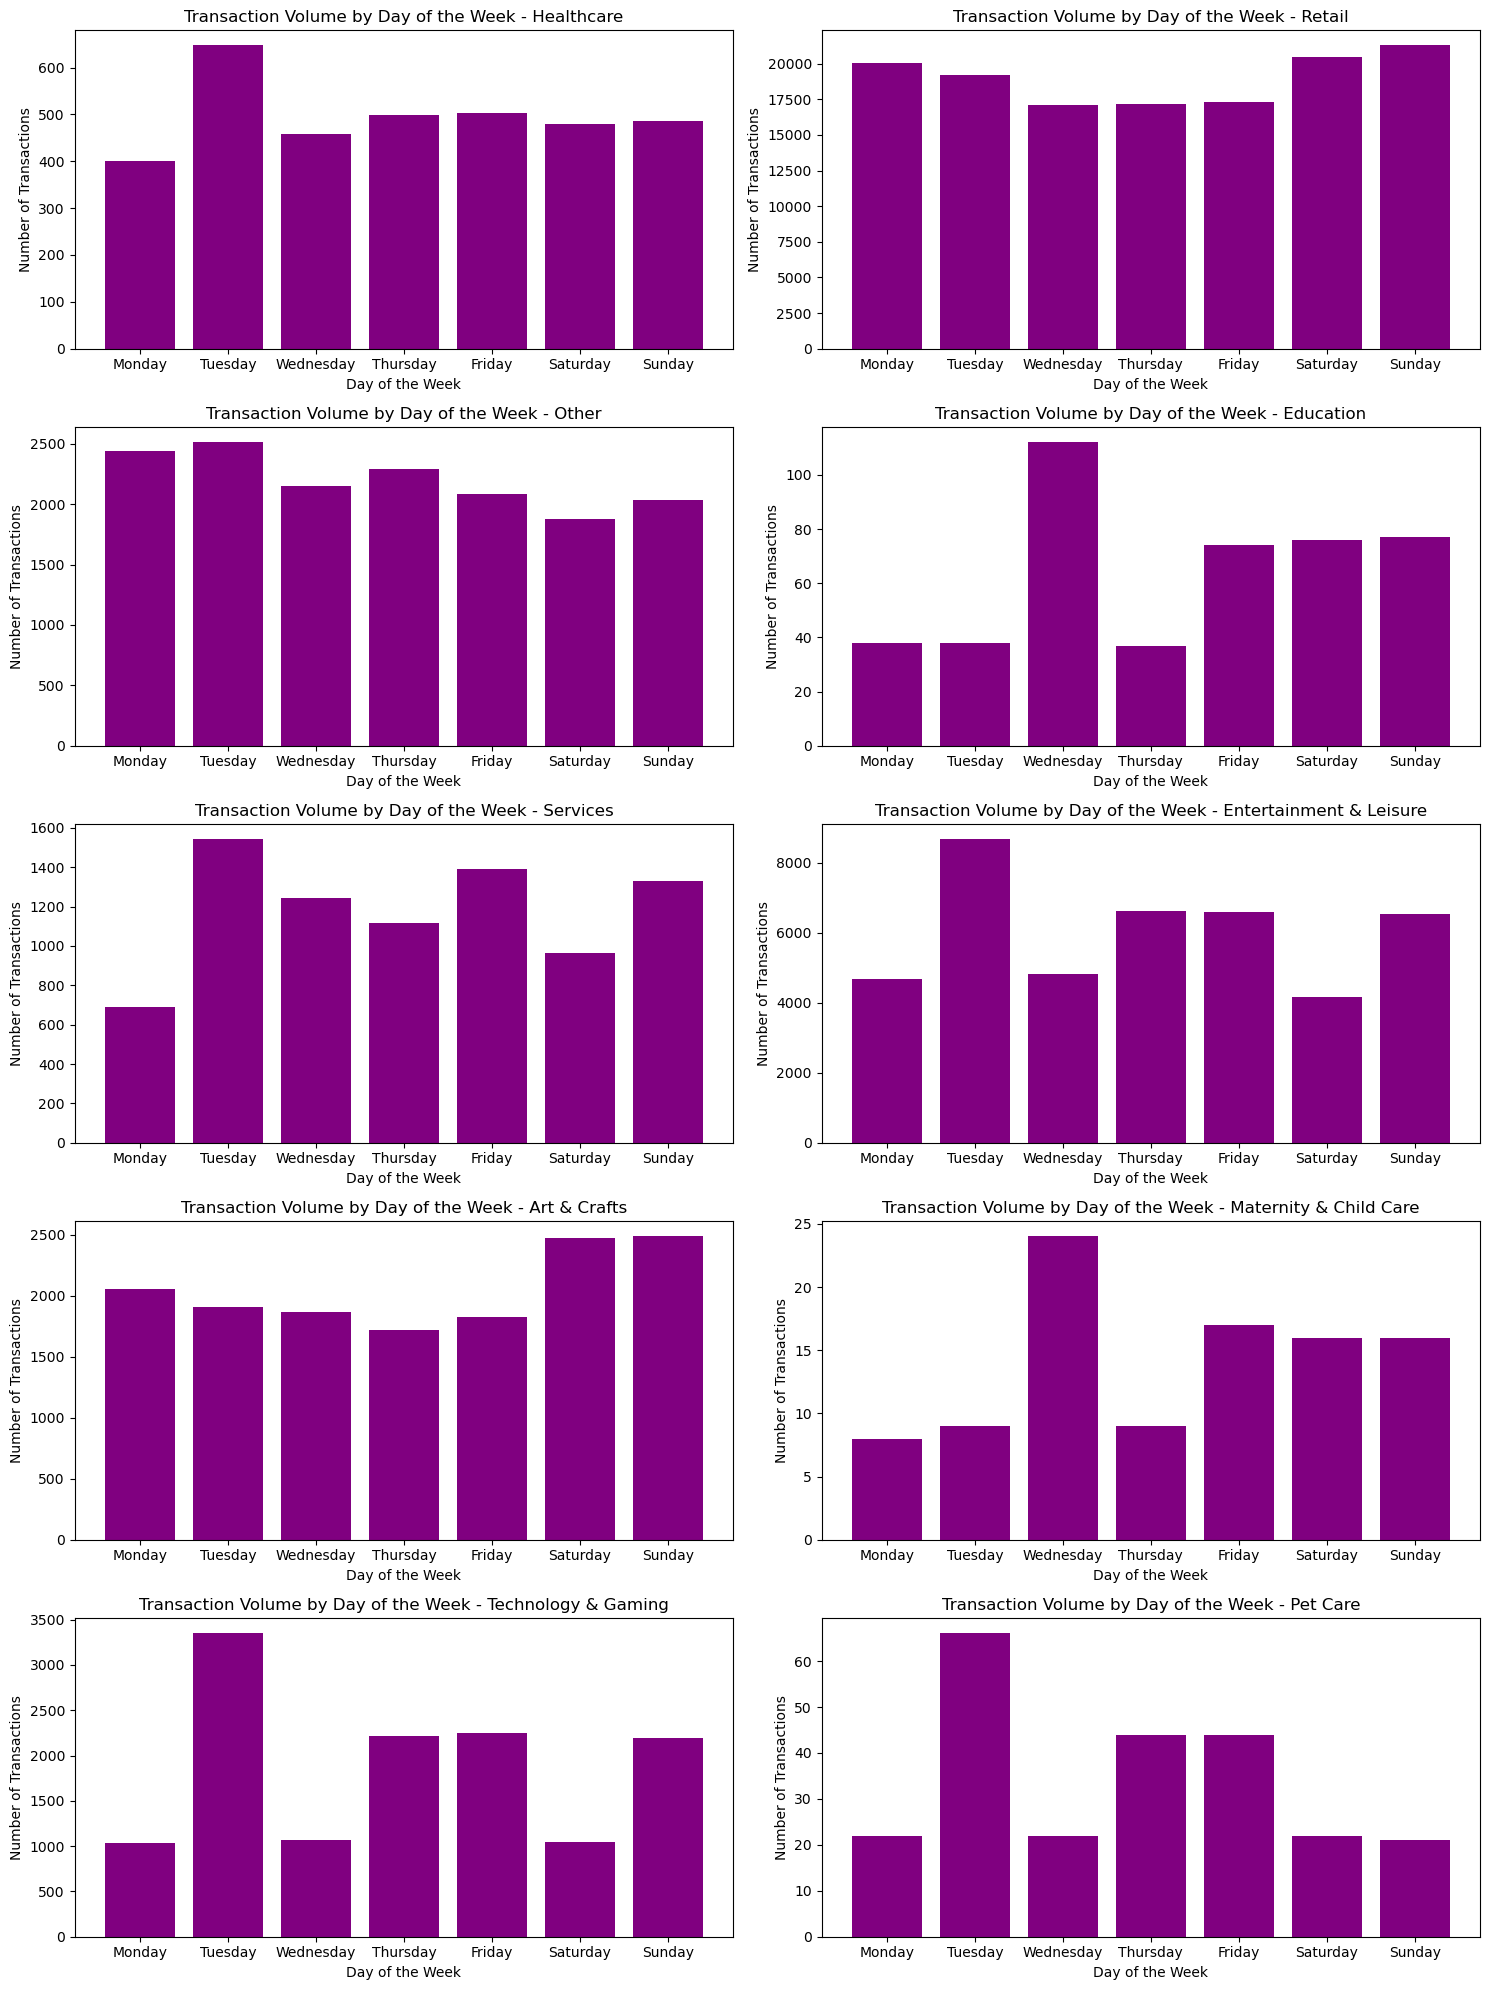

In [21]:
# Extract day of the week from datetime (Monday=0, Sunday=6)
data['DayOfWeek'] = data['Datetime'].dt.dayofweek


fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 20), constrained_layout=True)
axs = axs.flatten()

for index, category in enumerate(data['Category'].unique()):
    category_data = data[data['Category'] == category]
    dayofweek_counts = category_data.groupby('DayOfWeek').size()

    axs[index].bar(dayofweek_counts.index, dayofweek_counts.values, color='purple')
    axs[index].set_title(f'Transaction Volume by Day of the Week - {category}')
    axs[index].set_xlabel('Day of the Week')
    axs[index].set_ylabel('Number of Transactions')
    axs[index].set_xticks(range(0, 7))
    axs[index].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.tight_layout()
plt.show()


The bar charts show the transaction volumes by day of the week for each category. Here are some observations from the charts:

1. **Healthcare**: Transaction volumes are relatively consistent across the weekdays, with a slight dip on the weekend. This pattern suggests regular visits or transactions that are not strongly affected by the day of the week.

2. **Retail**: There is a noticeable trend towards higher transaction volumes towards the end of the week, peaking on Fridays and Saturdays, which is typical for retail shopping behavior.

3. **Other**: The category labeled "Other" displays a relatively even distribution of transactions across the week with no significant peaks, indicating a variety of transaction types that don't have a specific day-of-week trend.

4. **Education**: There are very few transactions, with no clear pattern discernible. This could be due to the nature of educational payments, which might not occur weekly.

5. **Services**: The volume of transactions in services peaks mid-week, suggesting that people might tend to utilize and pay for services more in the middle of the week.

6. **Entertainment & Leisure**: There is a significant drop in transactions during the week with volumes peaking on Fridays and Saturdays, reflecting typical leisure activity patterns.

7. **Art & Crafts**: Transaction activity seems to increase slightly towards the weekend, which may reflect the time when people engage in hobbies or leisure shopping more frequently.

8. **Maternity & Child Care**: The number of transactions is quite low overall, with no significant pattern across the week. This could indicate that the transactions are not routine or that there are few entities categorized under this sector.

9. **Technology & Gaming**: The volume is higher mid-week, with a drop on the weekend. This is somewhat atypical for the industry and could indicate specific promotions or release cycles for products and games.

10. **Pet Care**: There's some fluctuation in transaction volume with no clear trend, suggesting that transactions in this category may not be influenced by the day of the week.

These patterns can help businesses tailor their services, promotions, and staffing to meet customer demand effectively. For example, retailers might want to schedule more staff on Fridays and Saturdays to handle increased customer flow, while entertainment venues might focus their marketing efforts towards the end of the week.

## Balance by each category

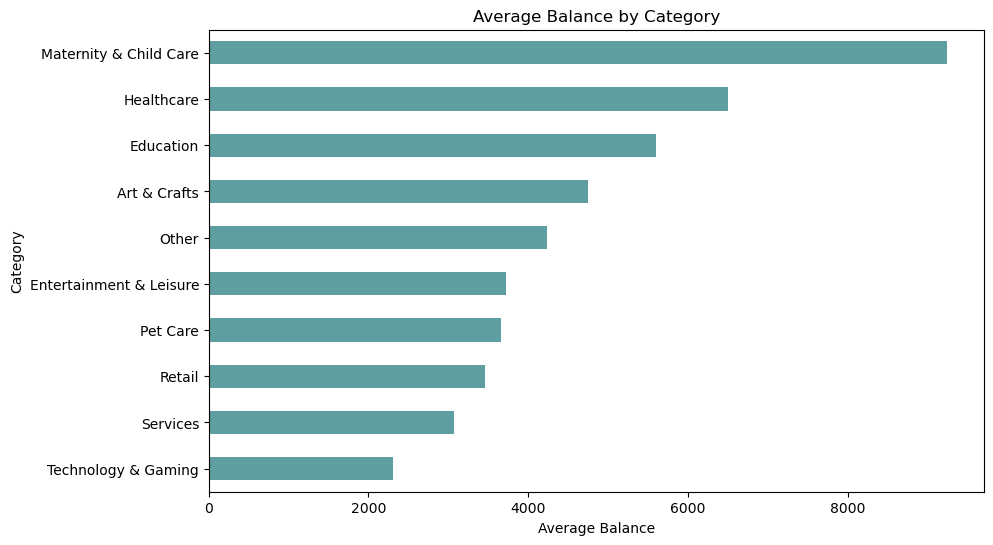

In [22]:
# Group data by category and calculate the average balance
average_balances = data.groupby('Category')['Balance'].mean()

average_balances = average_balances.sort_values()

# Plot the results
plt.figure(figsize=(10, 6))
average_balances.plot(kind='barh', color='cadetblue')
plt.title('Average Balance by Category')
plt.xlabel('Average Balance')
plt.ylabel('Category')
plt.show()


# Customer Requiring Financial Service

In [23]:
data = pd.read_csv('simulated_transaction_2024.csv')

In [24]:
# Calculate relevant metrics for each account
grouped_data = data.groupby('Account No').agg(
    Final_Balance=('Balance', 'last'),
    Total_Deposits=('Amount', lambda x: x[x > 0].sum()),
    Total_Withdrawals=('Amount', lambda x: x[x < 0].sum()),
    Net_Flow=('Amount', 'sum'),
    Transaction_Count=('Amount', 'count')
)

# Reset index to make Account No a column
customer_table = grouped_data.reset_index()
customer_table.head()


,Account No,Final_Balance,Total_Deposits,Total_Withdrawals,Net_Flow,Transaction_Count
0,101531259.0,227.972100,16967.5,-17683.58,-716.08,122
1,104832000.0,-3185.524859,20550.0,-25115.52,-4565.52,164
2,105375973.0,509.309653,9900.0,-10093.77,-193.77,158
3,106601471.0,11920.401863,18425.0,-7776.00,10649.00,192
4,108481285.0,10704.071830,25104.0,-15065.08,10038.92,368


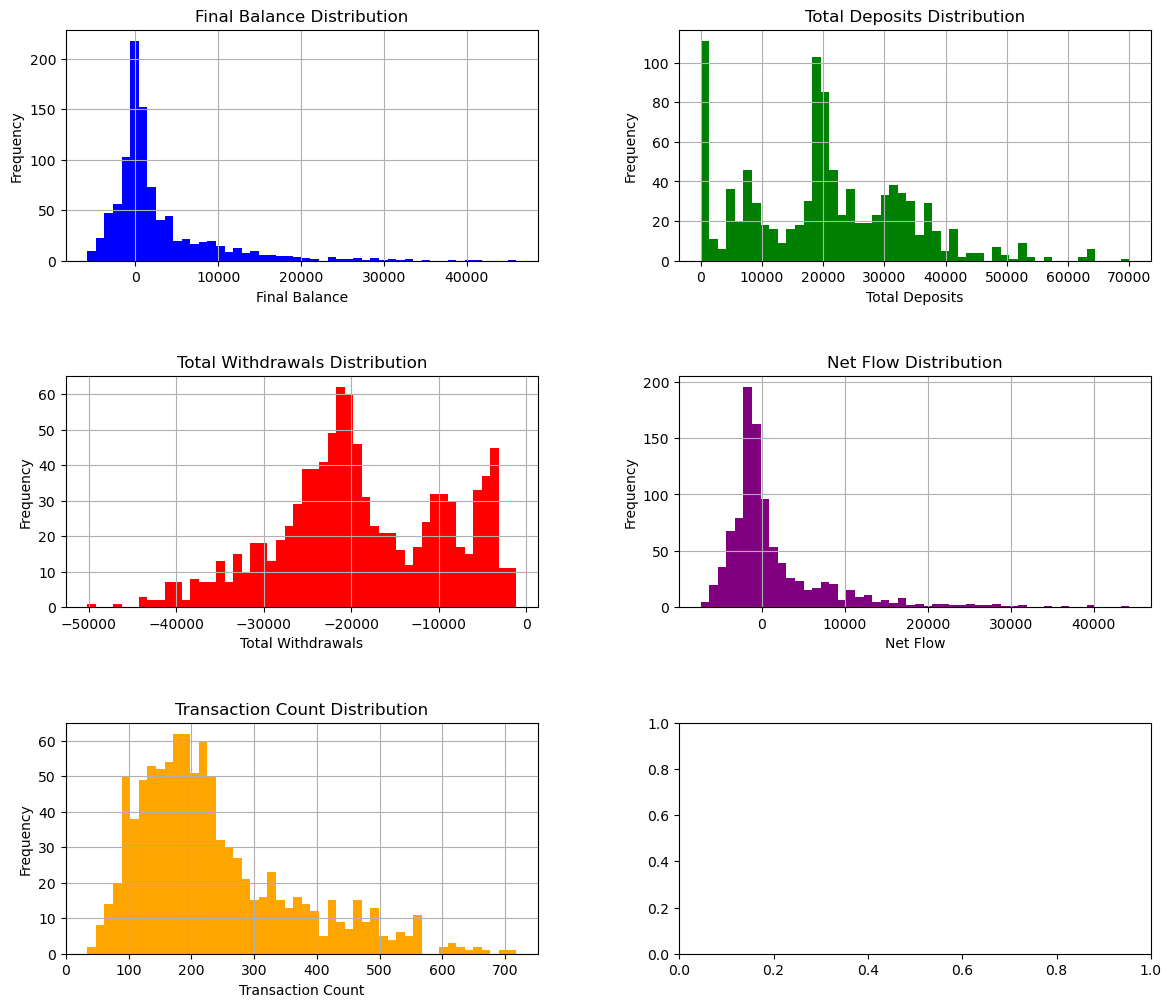

In [25]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# Plotting each metric in a subplot
customer_table['Final_Balance'].hist(ax=axes[0, 0], bins=50, color='blue')
axes[0, 0].set_title('Final Balance Distribution')
axes[0, 0].set_xlabel('Final Balance')
axes[0, 0].set_ylabel('Frequency')

customer_table['Total_Deposits'].hist(ax=axes[0, 1], bins=50, color='green')
axes[0, 1].set_title('Total Deposits Distribution')
axes[0, 1].set_xlabel('Total Deposits')
axes[0, 1].set_ylabel('Frequency')

customer_table['Total_Withdrawals'].hist(ax=axes[1, 0], bins=50, color='red')
axes[1, 0].set_title('Total Withdrawals Distribution')
axes[1, 0].set_xlabel('Total Withdrawals')
axes[1, 0].set_ylabel('Frequency')

customer_table['Net_Flow'].hist(ax=axes[1, 1], bins=50, color='purple')
axes[1, 1].set_title('Net Flow Distribution')
axes[1, 1].set_xlabel('Net Flow')
axes[1, 1].set_ylabel('Frequency')

customer_table['Transaction_Count'].hist(ax=axes[2, 0], bins=50, color='orange')
axes[2, 0].set_title('Transaction Count Distribution')
axes[2, 0].set_xlabel('Transaction Count')
axes[2, 0].set_ylabel('Frequency')

plt.show()


Here’s a breakdown of each feature:

1. **Final Balance**:
   - **Description**: This is the most recent balance recorded in each customer's account. It represents the current financial standing of the customer.
   - **Significance**: Higher balances might indicate customers who are better savers or who might have fewer liquidity issues, possibly qualifying them for investment products or additional banking services.

2. **Total Deposits**:
   - **Description**: The sum of all positive transactions (deposits) to the account. It includes wages, transfers from other accounts, or any other form of credit to the account.
   - **Significance**: This metric helps in understanding the inflow of money into the account. Customers with high total deposits may have higher incomes or more active financial transactions, potentially making them prime candidates for savings and investment products.

3. **Total Withdrawals**:
   - **Description**: The sum of all negative transactions (withdrawals). This includes expenses, payments, or any money sent out from the account.
   - **Significance**: Analyzing withdrawals provides insight into how much the customer spends or transfers. Frequent or large withdrawals could indicate higher spending or investment behaviors, which might be important for financial advising.

4. **Net Flow**:
   - **Description**: The difference between total deposits and total withdrawals. It effectively represents the net monetary gain or loss in the account over the observed period.
   - **Significance**: Positive net flow indicates that a customer is saving more money than they are spending, suggesting good financial health and potential for investment. A negative net flow could signify financial stress or high spending habits, possibly indicating a need for financial planning services.

5. **Transaction Count**:
   - **Description**: The total number of transactions recorded for the account. This includes both credits and debits.
   - **Significance**: This feature gives an idea of the account's activity level. A higher number of transactions might suggest that the customer uses their account frequently, which could be an indicator of engagement with financial services. Active users might be more open to new banking products or services.

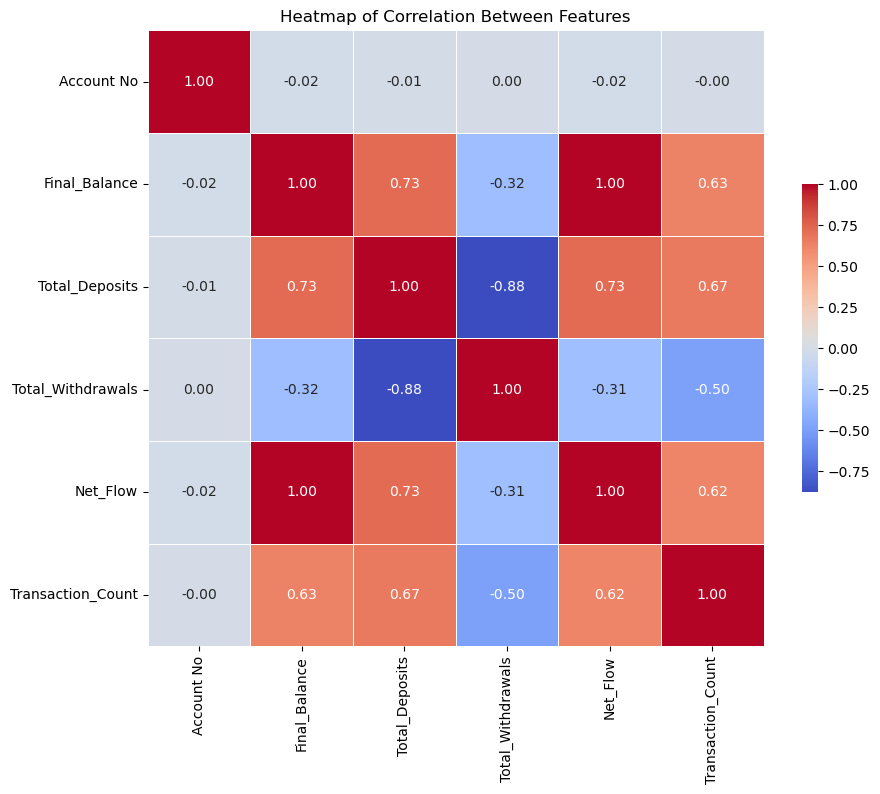

In [26]:
# Assuming 'customer_table' is your DataFrame
correlation_matrix = customer_table.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Heatmap of Correlation Between Features')
plt.show()



- **Final Balance and Total Deposits**: There's a strong positive correlation (0.73), suggesting that accounts with higher deposits tend to have higher final balances. This makes intuitive sense as more money coming in can increase the account balance, assuming spending habits remain consistent.

- **Total Deposits and Total Withdrawals**: There's a strong negative correlation (-0.85), indicating that accounts with higher deposits tend to have lower withdrawals. This could mean that those who deposit more are also saving more, rather than spending.

- **Total Deposits and Transaction Count**: A positive correlation (0.64) here means that accounts with more deposits also tend to have a higher number of transactions. This suggests active accounts with frequent deposits.

- **Total Withdrawals and Net Flow**: The strong negative correlation (-0.85) implies that higher withdrawals are associated with lower net flow, which is logical as net flow is calculated by subtracting withdrawals from deposits.

- **Final Balance and Net Flow**: There's a perfect positive correlation (1.00) because the final balance is directly affected by the net flow—more net inflow will increase the final balance.

- **Final Balance and Transaction Count**: A moderate positive correlation (0.59) suggests that accounts with a higher balance tend to have more transactions. This may indicate that customers with more funds are more active in their account usage.

Correlations close to zero (like those between 'Account No' and other variables) indicate no linear relationship.

C:\Users\86133\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\86133\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\86133\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\86133\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

C:\Users\86133\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\86133\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\86133\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\86133\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

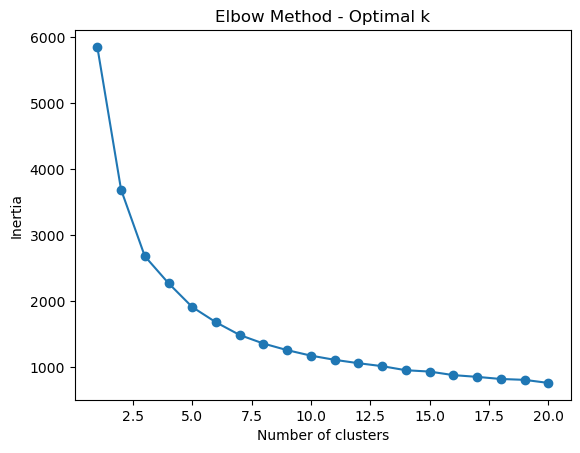

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 1: Preprocessing
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_table)

# Step 2: Choosing K - Elbow Method
inertia = []
k_options = range(1, 21)

for k in k_options:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(k_options, inertia, marker='o')
plt.title('Elbow Method - Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [28]:
# Step 3: Training the Model with chosen k
# We take K=10 as after 10 the benefits of adding more cluster centers will diminish.
optimal_k = 10
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_features)

# Step 4: Analyzing Clusters
customer_table['Cluster'] = kmeans.labels_

# Analyze the mean values of each cluster to understand their characteristics
cluster_profiles = customer_table.groupby('Cluster').mean()
print(cluster_profiles)

# Check the silhouette score
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print('Silhouette Score:', silhouette_avg)

C:\Users\86133\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\86133\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


           Account No  Final_Balance  Total_Deposits  Total_Withdrawals  \
Cluster                                                                   
0        7.600493e+08    3768.566702    22968.601522      -20473.064783   
1        7.020640e+08   13212.374128    39988.203774      -28105.175283   
2        3.450263e+08    6301.151288    29088.123846      -23932.571692   
3        7.796997e+08   -1456.268697     3776.666667       -6583.029275   
4        5.313067e+08    2214.401561    35148.006000      -34206.446952   
5        3.211291e+08   -1113.466708     4839.583333       -7121.665139   
6        2.927288e+08     987.803751    20654.478581      -20963.219548   
7        7.525751e+08    -213.858845    19273.267636      -20756.004000   
8        4.689580e+08   15017.164227    31467.758788      -17648.606061   
9        5.146973e+08   29818.688109    52898.261538      -24297.516154   

             Net_Flow  Transaction_Count  
Cluster                                   
0         249

**From the table provided, Cluster 5 stands out with the highest average final balance and net flow, as well as a high number of transactions, which are strong indicators of customers who may be interested in financial services.**




In [29]:
cluster_5_customers = customer_table[customer_table['Cluster'] == 5]

# Sort by 'Final_Balance' or 'Net_Flow' in descending order to get customers with the highest values
sorted_customers = cluster_5_customers.sort_values(by='Final_Balance', ascending=False)


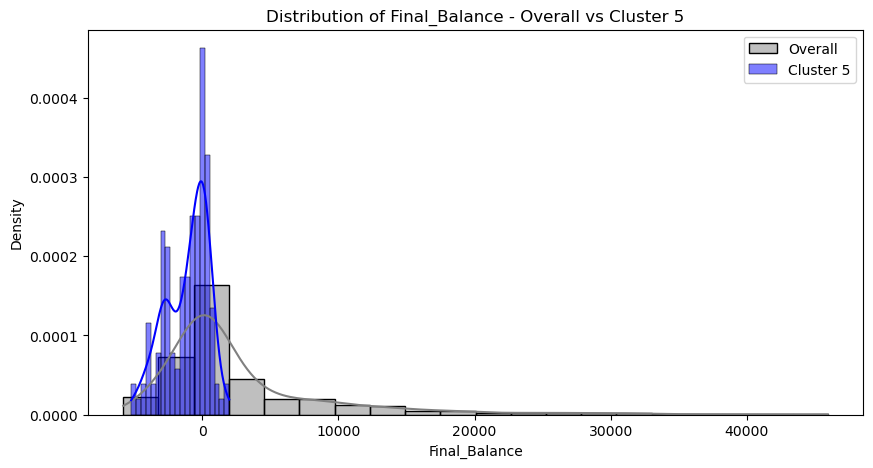

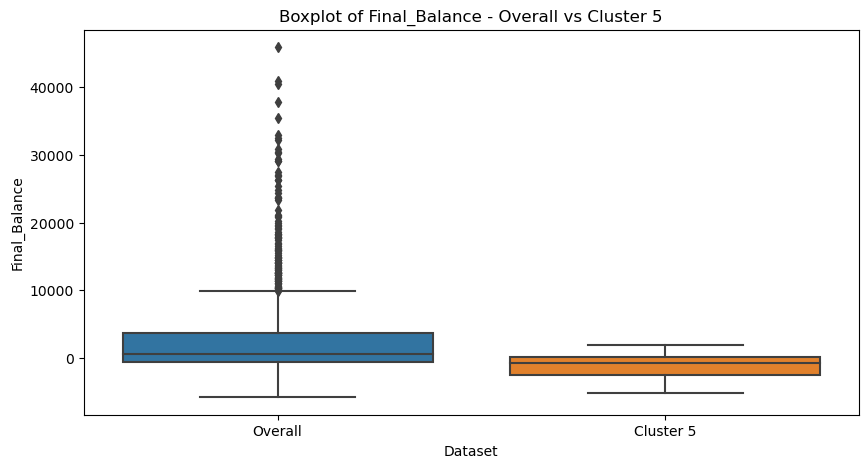

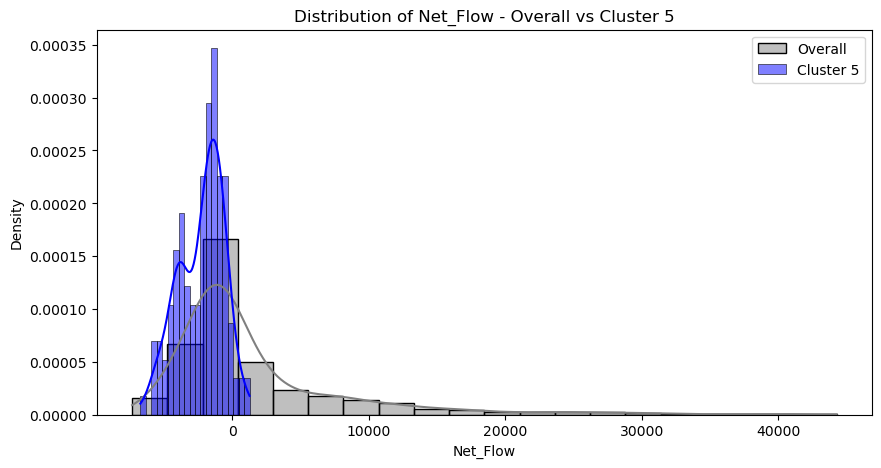

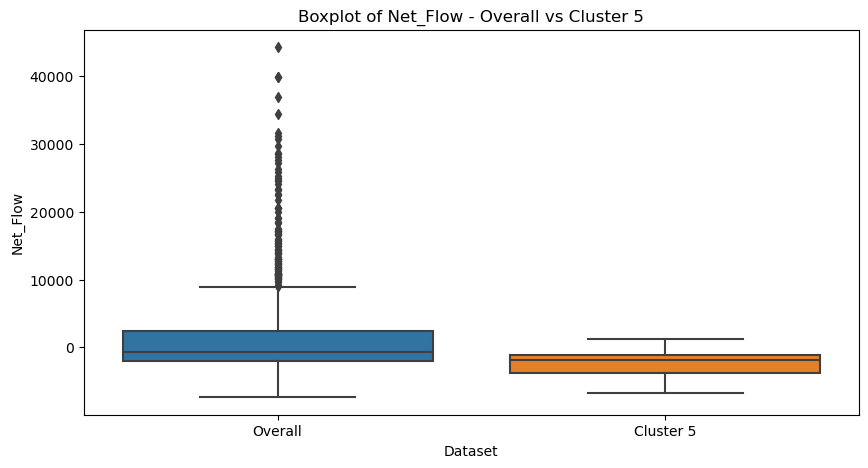

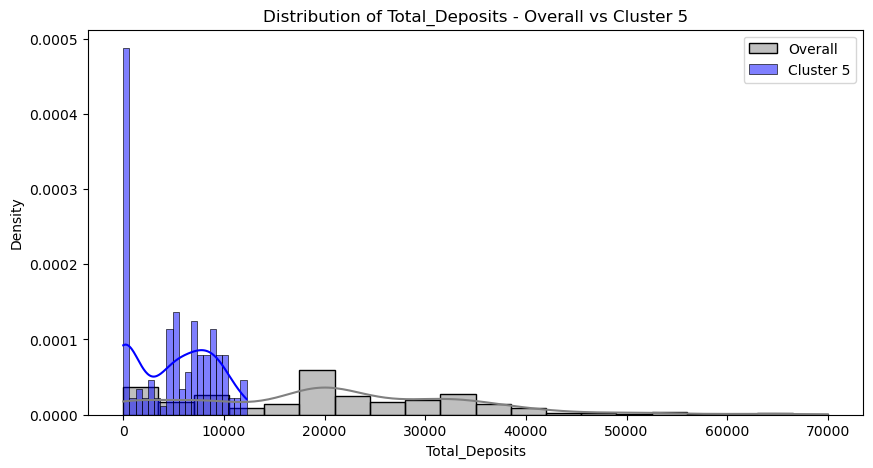

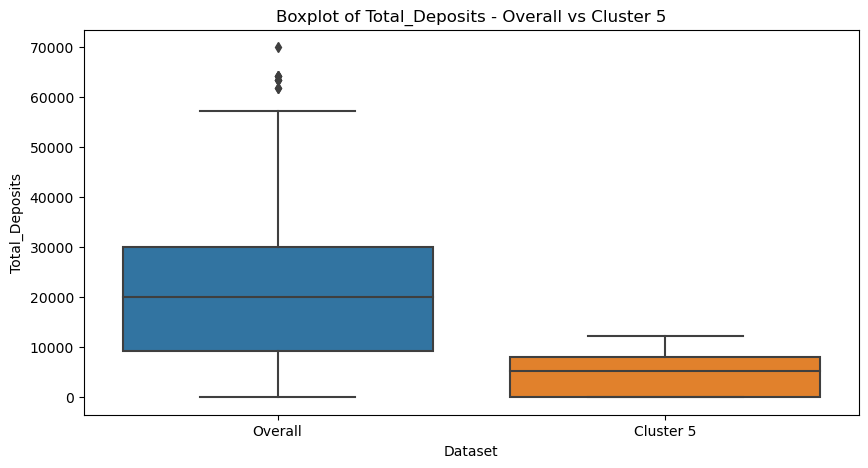

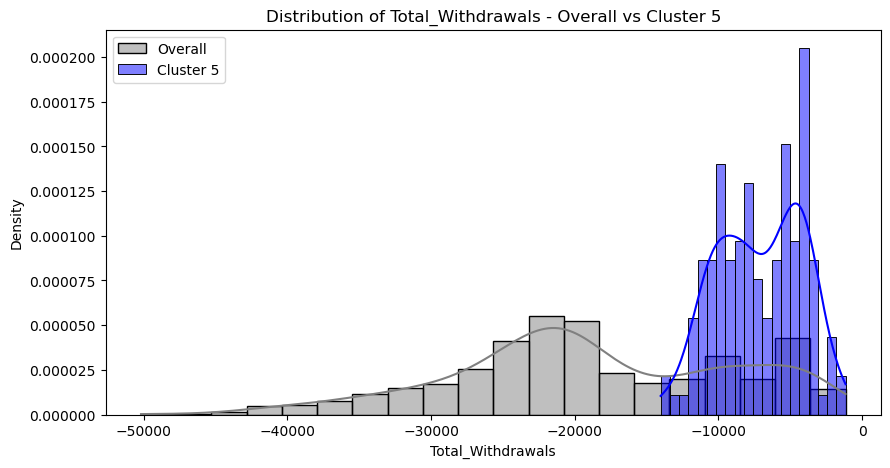

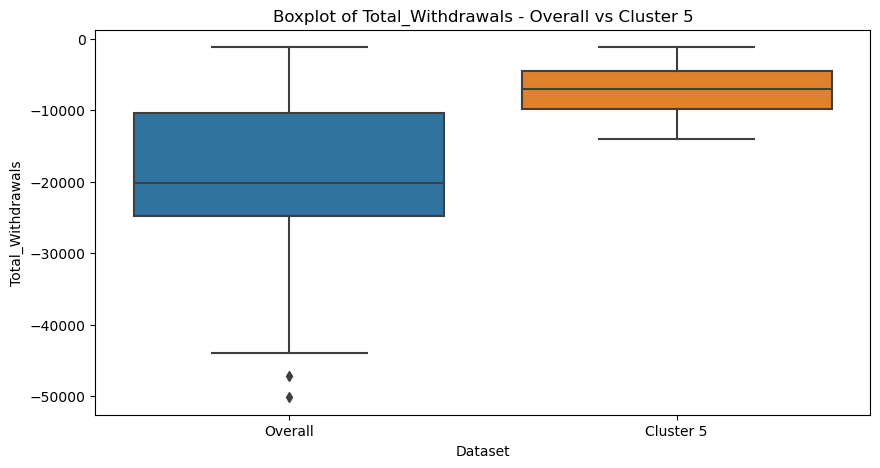

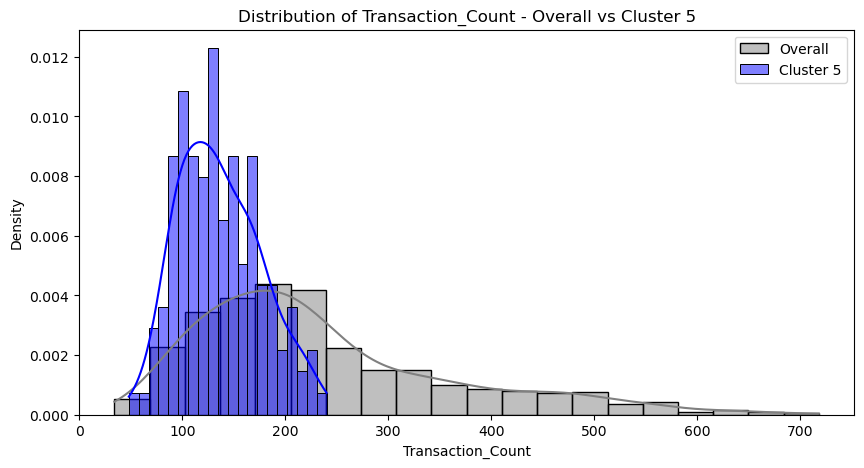

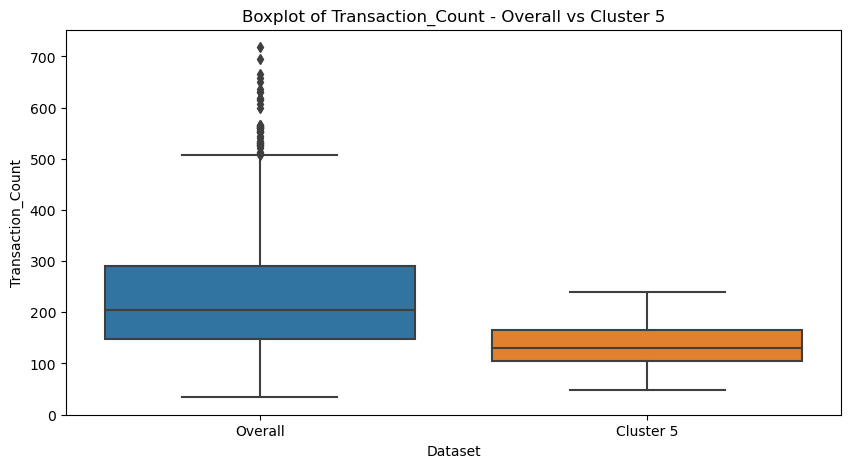

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns


metrics = ['Final_Balance', 'Net_Flow', 'Total_Deposits', 'Total_Withdrawals', 'Transaction_Count']

for metric in metrics:
    plt.figure(figsize=(10, 5))

    # Plot histogram for overall data
    sns.histplot(customer_table[metric], color="grey", label='Overall', kde=True, stat="density", bins=20)

    # Plot histogram for sorted customers
    sns.histplot(sorted_customers[metric], color="blue", label='Cluster 5', kde=True, stat="density", bins=20)

    plt.title(f'Distribution of {metric} - Overall vs Cluster 5')
    plt.xlabel(metric)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))

    combined_data = pd.concat([
        customer_table.assign(Dataset='Overall'),
        sorted_customers.assign(Dataset='Cluster 5')
    ])

    sns.boxplot(x='Dataset', y=metric, data=combined_data)

    plt.title(f'Boxplot of {metric} - Overall vs Cluster 5')
    plt.xlabel('Dataset')
    plt.ylabel(metric)
    plt.show()


- **Final Balance**:

 **Histogram**: The histogram shows a bimodal distribution for the overall data, with most values concentrated around the lower end, indicating a majority of customers with lower final balances. Cluster 5 customers have a unimodal distribution with values skewed towards higher balances.

 **Boxplot**: The boxplot reveals that Cluster 5 has both a higher median and a wider range of final balances compared to the overall dataset. The overall data has many outliers on the higher end, which could include some of the Cluster 5 customers.

- **Net Flow**:

 **Histogram**: The overall data distribution appears centered around a lower net flow, with a long tail extending towards higher values. Cluster 5’s distribution is more concentrated in the higher net flow region, suggesting these customers generally experience greater net inflows.

 **Boxplot**: Again, Cluster 5's median net flow is significantly higher than the overall population, and its interquartile range (IQR) is broader, signifying more variability among these customers' net flows. The overall dataset shows a more concentrated IQR and fewer outliers.

- **Total Deposits**:

 **Histogram**: Total deposits for the overall population have a peak at the lower end and another smaller peak in the middle range. Cluster 5's histogram shows a preference for the middle to upper range of deposits, indicating these customers make larger deposits on average.

 **Boxplot**: The overall data has a lower median for total deposits and a smaller IQR compared to Cluster 5. Cluster 5 has a much higher median, indicating that the typical customer in this cluster deposits more money than the typical customer in the overall population.

- **Total Withdrawals**:

 **Histogram**: Both histograms show that withdrawals are skewed toward the lower end. However, Cluster 5 seems to have a slightly higher frequency of large withdrawals compared to the overall data.

 **Boxplot**: For total withdrawals, Cluster 5 has a similar median to the overall dataset but a higher IQR, suggesting more variability among these customers' withdrawal amounts.
Transaction Count:
Histogram: The overall transaction count distribution is skewed right, with a peak in the lower transaction counts. Cluster 5 shows a more evenly distributed range, with a peak in the higher transaction counts.
Boxplot: The overall data has a lower median transaction count and a tighter IQR, indicating less variability in transaction count. In contrast, Cluster 5 has a substantially higher median and a wider IQR, signifying that customers in this cluster are generally more active with their accounts.